In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mdtraj as mdj
import plumed 
from pymbar import timeseries


In [4]:
sim_log = pd.read_csv('outputs_ext2/NPT_log', delimiter=r"\s+")
sim_log.columns

Index(['#"Step"', 'Time (ps)', 'Potential Energy (kJ/mole)',
       'Kinetic Energy (kJ/mole)', 'Total Energy (kJ/mole)', 'Temperature (K)',
       'Box Volume (nm^3)'],
      dtype='object')

In [8]:
A_t = sim_log['Potential Energy (kJ/mole)'].to_numpy()
t0, g, Neff_max = timeseries.detect_equilibration(A_t) # compute indices of uncorrelated timeseries
A_t_equil = A_t[t0:]
indices = timeseries.subsample_correlated_data(A_t_equil, g=g)
print(A_t_equil)
A_n = A_t_equil[indices]

[-1429917.81039589 -1429693.09024122 -1427940.31063788 ...
 -1430929.38012835 -1431764.04302262 -1429815.70306265]


(1609,)
1609.6143


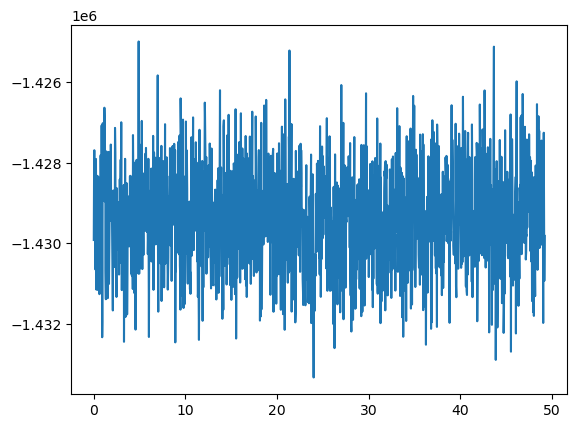

In [20]:
time = np.array(indices) * 20 / 1000  # ns
print(time.shape)
plt.plot(time, A_n)
print(Neff_max)